In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

lap_times = pd.read_csv('data/lap_times.csv')
races = pd.read_csv('data/races.csv')

df = pd.merge(lap_times, races, on = ['raceId'])

Not shown: The hours wasted attempting to use pandas multiindexes to aggregate columns.

In [8]:
def get_means(year, id_start, id_end):
	races = df[df['year'] == year]

	race_and_driver = races.groupby(['raceId', 'driverId'])['milliseconds'].apply(list)
	race_id = []
	means = []

	for i in range(id_start, id_end + 1):
		for row in race_and_driver[i]:
			race_id.append(i)
			means.append(np.mean(row))

	merge = pd.DataFrame(list(zip(race_id, means)), columns = ['race_id', 'mean_lap_time'])
	grouped = merge.groupby(['race_id'])['mean_lap_time'].apply(list)

	final = []
	for x in grouped:
		final.append(np.std(x) / 1000)

	return final

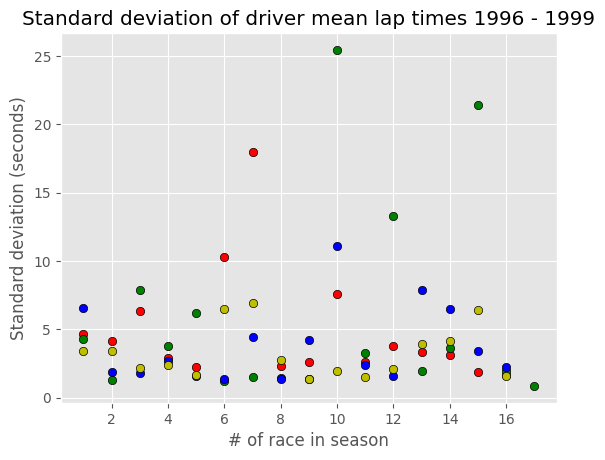

In [16]:

std_1996 = get_means(1996, 224, 239)
std_1997 = get_means(1997, 207, 223)
std_1998 = get_means(1998, 191, 206)
std_1999 = get_means(1999, 175, 190)

plt.style.use('ggplot')
plt.figure(dpi = 100)
plt.scatter(np.arange(1, len(std_1996)+1), std_1996, color = 'r', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_1997)+1), std_1997, color = 'g', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_1998)+1), std_1998, color = 'b', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_1999)+1), std_1999, color = 'y', edgecolor = 'k')

plt.ylabel('Standard deviation (seconds)');
plt.title('Standard deviation of driver mean lap times 1996 - 1999');
plt.xlabel('# of race in season');